In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('C:/ssafy/Project/04_PJT/example/austin_weather.csv')

In [9]:
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [48]:
df['month'] = df['Date'].apply(lambda x: x[:-3])

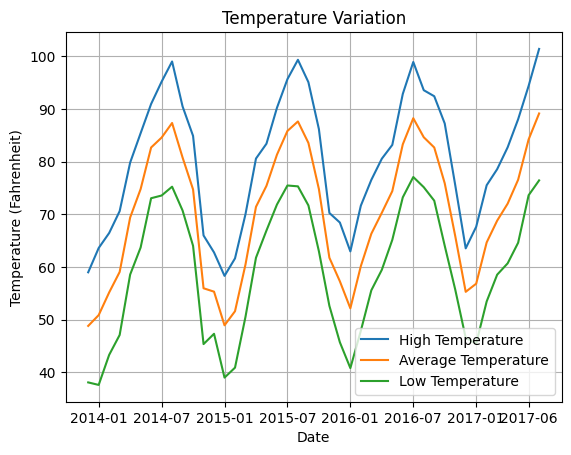

In [62]:
plt.title('Temperature Variation')
plt.xlabel('Date')
plt.ylabel('Temperature (Fahrenheit)')

plt.plot(df.groupby('month')[['TempHighF','TempAvgF','TempLowF']].mean())
plt.xticks(['2014-01','2014-07','2015-01','2015-07','2016-01', '2016-07','2017-01','2017-06'])
plt.grid()
plt.legend(('High Temperature','Average Temperature','Low Temperature'), loc = 'lower right')

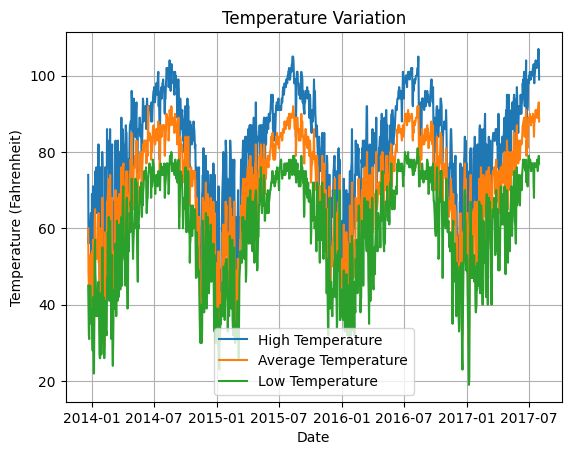

In [39]:
plt.title('Temperature Variation')
plt.xlabel('Date')
plt.ylabel('Temperature (Fahrenheit)')
plt.plot(df['Date'], df['TempHighF'], label = 'High Temperature')
plt.plot(df['Date'], df['TempAvgF'], label = 'Average Temperature')
plt.plot(df['Date'], df['TempLowF'], label = 'Low Temperature')
plt.grid()

plt.legend(loc = 'lower center')

In [103]:
weather = dict()
for weathers in df['Events']:
    events = weathers.replace(' ', '').split(',')
    if events == ['']:
        weather.setdefault('No Events', 0)
        weather['No Events'] += 1
    else:
        for event in events:
            weather.setdefault(event, 0)
            weather[event] += 1

In [105]:
w_list = sorted(weather.items(), key = lambda x:x[1], reverse=True)
key_list=[]
v_list=[]
for key, value in w_list:
    key_list.append(key)
    v_list.append((value))


Text(0, 0.5, 'Count')

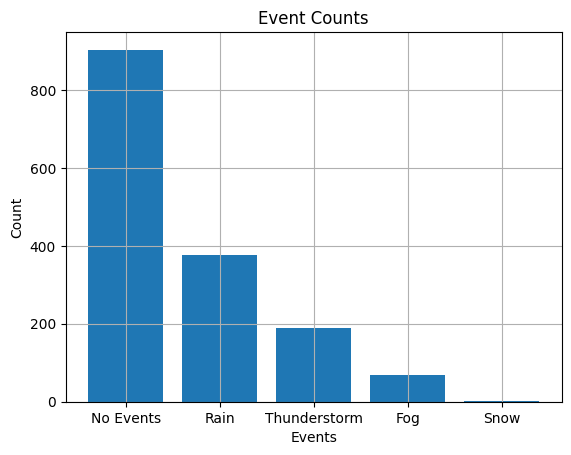

In [108]:
plt.bar(key_list, v_list)
plt.grid()
plt.title('Event Counts')
plt.xlabel('Events')
plt.ylabel('Count')